<a href="https://colab.research.google.com/github/atc857/linregblu365/blob/main/blu365_mod2_fgv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dados iniciais

**Integrantes do Grupo**:

André Telles Campos

Jeann Wilson C. Aguiar

Leandro Moura

Thálita Fernandes de Araújo



**Instruções**

Descrição: a base em anexo, da empresa Blu365, trata de um problema de recuperação de crédito. No arquivo .xlsx a base propriamente dita. Nos arquivos .pdf e .mp4 temos uma apresentação explicando o modelo a ser desenvolvido, feita pelo head de Data Science da empresa, Sr.João Netto (ex-FGV).

No arquivo: dados brutos e descrição das principais variáveis nome do arquivo: blu365_dataset_recuperação_de_crédito.xlsx

A disciplina é inicial: o negócio é entender o processo, escolher as variáveis de entrada, limpar os dados, criar o modelo e avaliar. Não é necessário se preocupar em selecionar as melhores variáveis, reduzir categorias etc. Precisa apenas escolher as variáveis, codificar, separar em treino e teste, calcular os parâmetros (possivelmente pelo solver do excel), testar o modelo e avaliar com a curva ROC.

Fazer apenas o modelo de regressão linear.

**Dicionário de dados**

|  Variável |  Descrição |
|---|---|
|datadisparo   |  Data do disparo de SMS |
|  ddd | ddd do telefone para o qual o SMS foi enviado  |
| sms_entregue  | quantidade histórica de SMSs com status de "entregue" para esse número  |
| sms_enviado  | quantidade histórica de SMSs com status de "enviado" para esse número  |
| sms_naoentregue  | quantidade histórica de SMSs com status de "não entregue" para esse número  |
| sms_rejeitado  | quantidade histórica de SMSs com status de "rejeitado" para esse número  |
| sms_invalido  | quantidade histórica de SMSs com status de "invalido" para esse número  |
| data_atraso  | data de atraso da dívida  |
| valor  | valor total da dívida em atraso  |
| operadora  | operadora do celular do inadimplente  |
| qtd_hist_acessos  | quantidade histórica de acessos da pessoa na plataforma BLU  |
| data_maisrecente_acesso  | data do acesso mais recente  |
| data_maisantiga_acesso  | data do acesso mais antigo  |
| sms_total_tent  | total histórico de tentativas de envio de SMSs para o número  |
| idade  | idade  |
| genero  | genero  |
| compradoronline  | índice de A (mais alto) a H indicando se a pessoa tem costume de comprar online |
| vendedoronline  | índice de A (mais alto) a H indicando se a pessoa tem costume de vender online  |
| utilizacaoweb  | índice de A (mais alto) a H indicando se a pessoa tem costume de usar a web  |
|rendaestimada | renda estimada da pessoa |
| acesso | variável a ser prevista: se a pessoa acessou ou não o site após o disparo |
| acordo | variável a ser prevista: se a pessoa fez ou não um acordo no site após o disparo |


In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Leitura da base de dados
dir_file = "https://media.githubusercontent.com/media/atc857/linregblu365/main/blu365_dataset.csv"
df = pd.read_csv(dir_file, sep=';')

In [3]:
df.head()

,datadisparo,ddd,sms_entregue,sms_enviado,sms_naoentregue,sms_rejeitado,sms_invalido,data_atraso,valor,operadora,...,data_maisantiga_acesso,sms_total_tent,idade,genero,compradoronline,vendedoronline,utilizacaoweb,rendaestimada,acesso,acordo
0,19/05/2020,62,0,0,0,0,0,24/05/2019,126.21,Claro,...,NaN,0,22.0,M,H,H,H,NaN,0,0
1,27/04/2020,67,3,0,0,0,0,14/04/2017,244.29,Vivo,...,NaN,3,56.0,F,D,H,D,ATE 2 SM,0,0
2,14/05/2020,51,1,0,0,0,0,04/09/2019,51.00,Claro,...,NaN,1,45.0,M,B,H,B,ATE 2 SM,0,0
3,13/05/2020,51,0,0,0,0,0,14/11/2019,307.91,Tim,...,NaN,0,35.0,F,B,H,B,4 A 10 SM,0,0
4,25/05/2020,62,0,0,12,0,0,14/03/2017,154.12,Tim,...,NaN,12,43.0,F,A,H,A,NaN,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686383 entries, 0 to 686382
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   datadisparo              686383 non-null  object 
 1   ddd                      686383 non-null  int64  
 2   sms_entregue             686383 non-null  int64  
 3   sms_enviado              686383 non-null  int64  
 4   sms_naoentregue          686383 non-null  int64  
 5   sms_rejeitado            686383 non-null  int64  
 6   sms_invalido             686383 non-null  int64  
 7   data_atraso              686383 non-null  object 
 8   valor                    686383 non-null  float64
 9   operadora                686383 non-null  object 
 10  qtd_hist_acessos         686383 non-null  int64  
 11  data_maisrecente_acesso  77512 non-null   object 
 12  data_maisantiga_acesso   77512 non-null   object 
 13  sms_total_tent           686383 non-null  int64  
 14  idad

In [5]:
# Converte as colunas de data para datetime no pandas
df['datadisparo'] = pd.to_datetime(df['datadisparo'], errors='coerce')
df['data_atraso'] = pd.to_datetime(df['data_atraso'], errors='coerce')
df['data_maisrecente_acesso'] = pd.to_datetime(df['data_maisrecente_acesso'], errors='coerce')
df['data_maisantiga_acesso'] = pd.to_datetime(df['data_maisantiga_acesso'], errors='coerce')

<ipython-input-5-e483585deb03>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['datadisparo'] = pd.to_datetime(df['datadisparo'], errors='coerce')
<ipython-input-5-e483585deb03>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['data_atraso'] = pd.to_datetime(df['data_atraso'], errors='coerce')
<ipython-input-5-e483585deb03>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['data_maisrecente_acesso'] = pd.to_datetime(df['data_maisrecente_acesso'], errors='coerce')
<ipython-input-5-e483585deb03>:5: UserWarning: Parsing dates in DD/MM/YYYY format whe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686383 entries, 0 to 686382
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   datadisparo              686383 non-null  datetime64[ns]
 1   ddd                      686383 non-null  int64         
 2   sms_entregue             686383 non-null  int64         
 3   sms_enviado              686383 non-null  int64         
 4   sms_naoentregue          686383 non-null  int64         
 5   sms_rejeitado            686383 non-null  int64         
 6   sms_invalido             686383 non-null  int64         
 7   data_atraso              686383 non-null  datetime64[ns]
 8   valor                    686383 non-null  float64       
 9   operadora                686383 non-null  object        
 10  qtd_hist_acessos         686383 non-null  int64         
 11  data_maisrecente_acesso  77512 non-null   datetime64[ns]
 12  data_maisantiga_

In [7]:
# Verifica a quantidade de valores ausentes nas colunas
df.isnull().sum()

datadisparo                     0
ddd                             0
sms_entregue                    0
sms_enviado                     0
sms_naoentregue                 0
sms_rejeitado                   0
sms_invalido                    0
data_atraso                     0
valor                           0
operadora                       0
qtd_hist_acessos                0
data_maisrecente_acesso    608871
data_maisantiga_acesso     608871
sms_total_tent                  0
idade                        1735
genero                       1733
compradoronline              1733
vendedoronline               1733
utilizacaoweb                1733
rendaestimada              165900
acesso                          0
acordo                          0
dtype: int64

In [8]:
# Resumo das principais medidas estatísitcas do dataset
df.describe()

,ddd,sms_entregue,sms_enviado,sms_naoentregue,sms_rejeitado,sms_invalido,valor,qtd_hist_acessos,sms_total_tent,idade,acesso,acordo
count,686383.000000,686383.000000,686383.000000,686383.000000,686383.000000,686383.0,686383.000000,686383.000000,686383.000000,684648.000000,686383.000000,686383.000000
mean,54.100716,2.225027,0.050928,0.938616,0.002046,0.0,268.770910,0.182840,3.208181,40.644479,0.027453,0.003374
std,11.441091,3.472402,0.649311,2.474068,0.185847,0.0,291.660576,0.655077,3.755364,14.697298,0.163398,0.057990
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.300000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,110.520000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.0,225.970000,0.000000,2.000000,38.000000,0.000000,0.000000
75%,62.000000,3.000000,0.000000,0.000000,0.000000,0.0,343.995000,0.000000,5.000000,49.000000,0.000000,0.000000
max,99.000000,23.000000,20.000000,22.000000,18.000000,0.0,61952.930000,20.000000,23.000000,136.000000,1.000000,1.000000


<ipython-input-9-d6e0f38d264e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Blues")


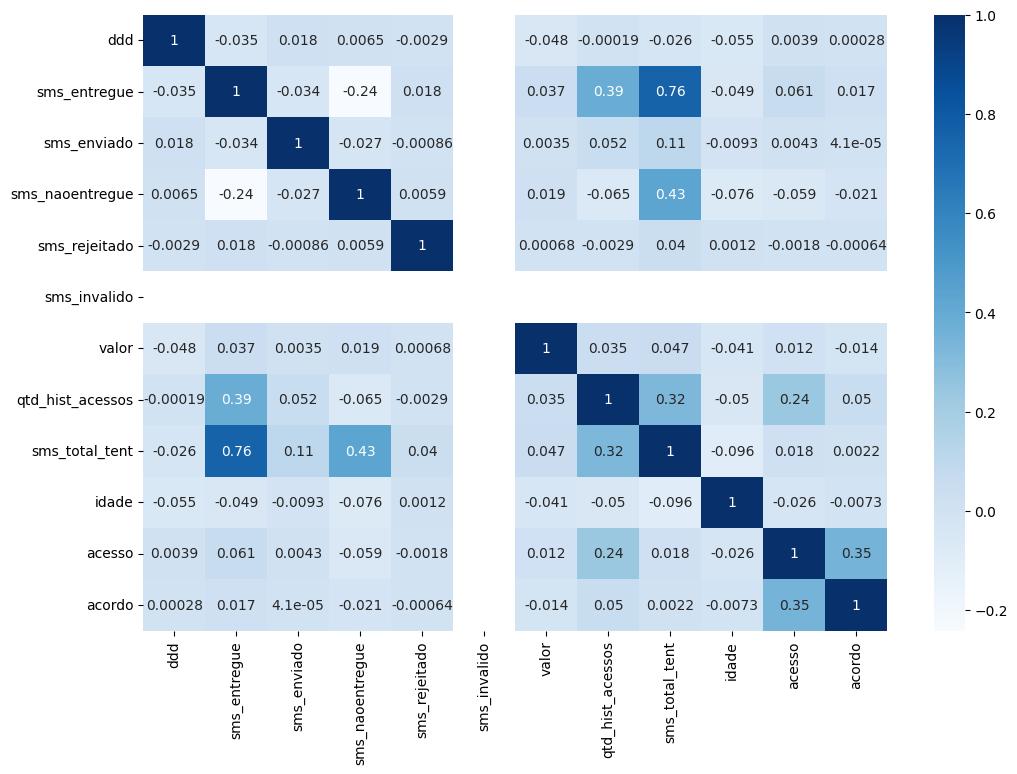

In [9]:
# Mapa de calor para a correlação entre variáveis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

# Manipulação de variáveis

Preparação da base de dados

Vamos considerar um modelo com as seguintes variáveis inicialmente:

- acesso-acordo
- datadisparo
- sms_entregue
- sms_enviado
- sms_naoentregue
- sms_rejeitado
- sms_invalido
- data_atraso
- valor
- operadora
- qtd_hist_acessos
- sms_total_tent
- idade
- genero
- utilizacaoweb
- rendaestimada
- dias_atraso = datadisparo - data_atraso
- dia_semana = datadisparo.dt.dayofweek

In [10]:
df.columns

Index(['datadisparo', 'ddd', 'sms_entregue', 'sms_enviado', 'sms_naoentregue',
       'sms_rejeitado', 'sms_invalido', 'data_atraso', 'valor', 'operadora',
       'qtd_hist_acessos', 'data_maisrecente_acesso', 'data_maisantiga_acesso',
       'sms_total_tent', 'idade', 'genero', 'compradoronline',
       'vendedoronline', 'utilizacaoweb', 'rendaestimada', 'acesso', 'acordo'],
      dtype='object')

In [11]:
# Copia a base original para um dataframe apenas com as colunas de interesse do modelo
base = df[['acesso','acordo','datadisparo','sms_entregue','sms_enviado','sms_naoentregue','sms_rejeitado',
           'sms_invalido','data_atraso','valor','operadora','qtd_hist_acessos',
           'sms_total_tent','idade','genero','utilizacaoweb','rendaestimada']]

In [12]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686383 entries, 0 to 686382
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   acesso            686383 non-null  int64         
 1   acordo            686383 non-null  int64         
 2   datadisparo       686383 non-null  datetime64[ns]
 3   sms_entregue      686383 non-null  int64         
 4   sms_enviado       686383 non-null  int64         
 5   sms_naoentregue   686383 non-null  int64         
 6   sms_rejeitado     686383 non-null  int64         
 7   sms_invalido      686383 non-null  int64         
 8   data_atraso       686383 non-null  datetime64[ns]
 9   valor             686383 non-null  float64       
 10  operadora         686383 non-null  object        
 11  qtd_hist_acessos  686383 non-null  int64         
 12  sms_total_tent    686383 non-null  int64         
 13  idade             684648 non-null  float64       
 14  gene

In [13]:
# Estratégia para lidar com os dados faltantes
# Uma opção é eliminar esses dados da base .dropna()
# Outra opção é preencher as células com algum valor representativo (por exemplo, zero ou valor anterior ou valor médio etc.) .fillna()
base.dropna(inplace=True)

<ipython-input-13-597b8d2fa6c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.dropna(inplace=True)


In [14]:
# Tamanho da base após retirada das linhas com valores ausentes
base.shape

(520483, 17)

In [15]:
# Cria coluna de dias de atraso da dívida até a data do disparo
base['dias_atraso'] = base['datadisparo'] - base['data_atraso']

<ipython-input-15-cf14615f91ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['dias_atraso'] = base['datadisparo'] - base['data_atraso']


In [16]:
# Converte a coluna dias_atraso em inteiro
base['dias_atraso'] = base['dias_atraso'].dt.days

<ipython-input-16-dde3e983d18a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['dias_atraso'] = base['dias_atraso'].dt.days


In [17]:
# Cria coluna dia da semana a partir da coluna data de disparo
base['dia_semana'] = base['datadisparo'].dt.day_name()

<ipython-input-17-82a0442e4dab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['dia_semana'] = base['datadisparo'].dt.day_name()


In [18]:
# Cria colunas dummy a partir da variável categórica dia_semana
base = pd.get_dummies(base, columns=["dia_semana"], prefix="")

In [19]:
# Cria colunas dummy a partir da variável categórica genero
base = pd.get_dummies(base, columns=["genero"], prefix="")

In [20]:
# Cria colunas dummy a partir da variável categórica operadora
base = pd.get_dummies(base, columns=["operadora"], prefix="")

In [21]:
# Cria colunas dummy a partir da variável categórica utilizacaoweb
base = pd.get_dummies(base, columns=["utilizacaoweb"], prefix="")

In [22]:
# Cria colunas dummy a partir da variável categórica rendaestimada
base = pd.get_dummies(base, columns=["rendaestimada"], prefix="")

In [23]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520483 entries, 1 to 686382
Data columns (total 46 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   acesso            520483 non-null  int64         
 1   acordo            520483 non-null  int64         
 2   datadisparo       520483 non-null  datetime64[ns]
 3   sms_entregue      520483 non-null  int64         
 4   sms_enviado       520483 non-null  int64         
 5   sms_naoentregue   520483 non-null  int64         
 6   sms_rejeitado     520483 non-null  int64         
 7   sms_invalido      520483 non-null  int64         
 8   data_atraso       520483 non-null  datetime64[ns]
 9   valor             520483 non-null  float64       
 10  qtd_hist_acessos  520483 non-null  int64         
 11  sms_total_tent    520483 non-null  int64         
 12  idade             520483 non-null  float64       
 13  dias_atraso       520483 non-null  int64         
 14  _Fri

In [24]:
base.head()

,acesso,acordo,datadisparo,sms_entregue,sms_enviado,sms_naoentregue,sms_rejeitado,sms_invalido,data_atraso,valor,...,_G,_H,_1/2 A 1 SM,_10 A 20 SM,_2 A 4 SM,_4 A 10 SM,_ACIMA DE 20 SM,_ATE 2 SM,_DE 1 A 1-5 SM,_SEM INFORMACAO
1,0,0,2020-04-27,3,0,0,0,0,2017-04-14,244.29,...,0,0,0,0,0,0,0,1,0,0
2,0,0,2020-05-14,1,0,0,0,0,2019-04-09,51.00,...,0,0,0,0,0,0,0,1,0,0
3,0,0,2020-05-13,0,0,0,0,0,2019-11-14,307.91,...,0,0,0,0,0,1,0,0,0,0
5,0,0,2020-05-19,0,0,1,0,0,2019-07-27,98.24,...,0,0,0,0,1,0,0,0,0,0
6,0,0,2020-05-13,0,0,0,0,0,2019-10-15,71.16,...,1,0,0,0,0,0,0,1,0,0


# Modelos de Regressão Linear

In [25]:
base.columns

Index(['acesso', 'acordo', 'datadisparo', 'sms_entregue', 'sms_enviado',
       'sms_naoentregue', 'sms_rejeitado', 'sms_invalido', 'data_atraso',
       'valor', 'qtd_hist_acessos', 'sms_total_tent', 'idade', 'dias_atraso',
       '_Friday', '_Monday', '_Saturday', '_Sunday', '_Thursday', '_Tuesday',
       '_Wednesday', '_F', '_M', '_U', '_Claro', '_Nextel', '_Oi', '_Outros',
       '_Tim', '_Vivo', '_A', '_B', '_C', '_D', '_E', '_F', '_G', '_H',
       '_1/2 A 1 SM', '_10 A 20 SM', '_2 A 4 SM', '_4 A 10 SM',
       '_ACIMA DE 20 SM', '_ATE 2 SM', '_DE 1 A 1-5 SM', '_SEM INFORMACAO'],
      dtype='object')

## Modelo de regressão para variável alvo: "acesso"

In [26]:
# Caso base dia_semana: '_Saturday'
# Caso base genero: '_U'
# Caso base operadora: '_Outros'
# Caso base utilizacaoweb: '_A'
# Caso base rendaestimada: '_SEM INFORMACAO'
# definição de variáveis
Y = base['acesso']
X = base[['sms_entregue','sms_enviado','sms_naoentregue','sms_rejeitado','sms_invalido','valor',
        'qtd_hist_acessos','sms_total_tent','idade','dias_atraso','_Friday', '_Monday','_Thursday', '_Tuesday','_Wednesday',
        '_F','_M','_Claro','_Nextel','_Oi','_Tim','_Vivo','_B','_C','_D','_E','_F','_G','_H',
        '_1/2 A 1 SM','_10 A 20 SM','_2 A 4 SM','_4 A 10 SM','_ACIMA DE 20 SM','_ATE 2 SM','_DE 1 A 1-5 SM']]

In [27]:
# vamos deixar o sklearn separar as variáveis em dois grupos treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
# cria o modelo e o treina com as variáveis separadas para treino
modelo1 = linear_model.LinearRegression()
modelo1.fit(X_train, y_train)

LinearRegression()

In [29]:
# Exibe os coeficientes do modelo na tela
a = modelo1.intercept_
b = modelo1.coef_
print(f"O intercepto é: {a:.4f}")
print(f"Os coeficientes angulares do modelo são: {b}")

O intercepto é: 0.0778
Os coeficientes angulares do modelo são: [-5.85787091e-04 -1.52792623e-03 -1.93226943e-03  1.18825405e-03
 -2.78835115e-15  2.79179140e-06  6.23263913e-02 -2.31235714e-03
 -2.36472961e-04  2.22108255e-07 -3.05752796e-03 -5.89163387e-03
  4.81331465e-04 -1.25502392e-02 -1.04468915e-03  6.26335998e-04
 -3.74678395e-03 -2.05358010e-03 -9.05121439e-03 -1.57280135e-02
 -1.05286351e-02 -1.01217092e-02 -1.02601236e-02 -2.44530664e-03
 -4.30655682e-03 -6.07065428e-03 -6.63915964e-03  6.26335998e-04
 -3.74678395e-03 -7.79480645e-03 -1.00544440e-02 -4.80672978e-02
 -2.52502916e-02 -2.53389919e-02 -2.72325997e-02 -2.67061892e-02
 -2.55649602e-02 -7.27496712e-02]


In [30]:
# Para avaliar a qualidade do modelo usamos a biblioteca metrics do sklearn
# Valores preditos pelo modelo
yhat = modelo1.predict(X_test)

In [31]:
# Coeficiente de determinação do modelo
# varia de 0 a 1 e indica o poder de explicação do modelo
r_sq = metrics.r2_score(y_test,yhat)
print(f"Coeficiente de determinação r2 = {r_sq:.4f}")

Coeficiente de determinação r2 = 0.0616


In [32]:
# auc (area under curve) é uma métrica que indica quão bom o modelo é para classificar verdadeiros positivos (tpr) sobre falsos positivos (fpr).
# O valor de auc deve estar acima de 0.5 (modelo "bobo", sem qualquer poder preditivo). E vai até 1.0 (modelo perfeito).
fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)
auc = metrics.auc(fpr,tpr)
print(auc)

0.7693007539138526


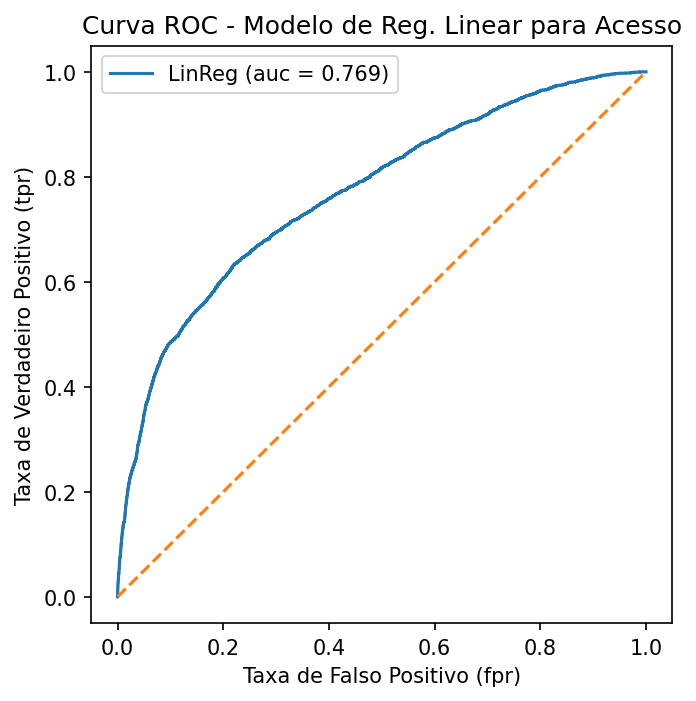

In [33]:
# Gráfico da curva ROC
plt.figure(figsize=(5,5), dpi=150)
plt.plot(fpr, tpr, ls='-', label='LinReg (auc = %0.3f)' % auc)
plt.plot([0,1],[0,1], ls='--')
plt.xlabel('Taxa de Falso Positivo (fpr)')
plt.ylabel('Taxa de Verdadeiro Positivo (tpr)')
plt.title('Curva ROC - Modelo de Reg. Linear para Acesso')
plt.legend()
plt.show()

In [34]:
# Encontra o limiar da probabilidade de corte que maximiza a auc (lift)
max_lift = np.argmax(tpr - fpr)
optimal_threshold = thresholds[max_lift]
yhat_binary = (yhat > optimal_threshold).astype(int)
print(f"Threshold ótimo: {optimal_threshold:.5f}")

Threshold ótimo: 0.03053


In [35]:
# Acurácia (quanto o modelo acerta em relação à realidade) e Precisão (taxa de acertos de valores positivos: tp / (tp + fp))
acur = metrics.accuracy_score(y_test, yhat_binary)
prec = metrics.precision_score(y_test, yhat_binary)
print(f'Acurácia do modelo = {acur:.1%}')
print(f'Precisão do modelo = {prec:.1%}')

Acurácia do modelo = 77.5%
Precisão do modelo = 8.0%


In [36]:
# taxa de sensibilidade
sensibilidade = metrics.recall_score(y_test, yhat_binary)
print(f'Sensibilidade do modelo = {sensibilidade:.1%}')

Sensibilidade do modelo = 63.3%


In [37]:
# taxa de especificidade
# matriz de confusão
conf_matrix = metrics.confusion_matrix(y_test, yhat_binary)

# Calcular a especificidade
especificidade = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Especificidade do modelo = {especificidade:.1%}')

Especificidade do modelo = 78.0%


## Modelo de regressão para variável alvo: "acordo"

In [38]:
# Vamos seguir os mesmos passos anteriores
# primeiro separa as variáveis
Y = base['acordo']
X = base[['sms_entregue','sms_enviado','sms_naoentregue','sms_rejeitado','sms_invalido','valor',
        'qtd_hist_acessos','sms_total_tent','idade','dias_atraso','_Friday', '_Monday','_Thursday', '_Tuesday','_Wednesday',
        '_F','_M','_Claro','_Nextel','_Oi','_Tim','_Vivo','_B','_C','_D','_E','_F','_G','_H',
        '_1/2 A 1 SM','_10 A 20 SM','_2 A 4 SM','_4 A 10 SM','_ACIMA DE 20 SM','_ATE 2 SM','_DE 1 A 1-5 SM']]

In [39]:
# Separa as variáveis em dois grupos treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
# cria o modelo e o treina com as variáveis separadas para treino
modelo2 = linear_model.LinearRegression()
modelo2.fit(X_train, y_train)

LinearRegression()

In [41]:
# Exibe os coeficientes do modelo na tela
a = modelo2.intercept_
b = modelo2.coef_
print(f"O intercepto é: {a:.4f}")
print(f"Os coeficientes angulares do modelo são: {b}")

O intercepto é: 0.0058
Os coeficientes angulares do modelo são: [ 1.10019356e-04  2.56210664e-06 -2.19483724e-04  9.88005997e-05
 -1.01157418e-15 -3.32105329e-06  4.40759899e-03 -2.89868957e-04
 -2.79374119e-05  1.95764323e-07  7.09849846e-04 -2.99538130e-04
  1.20563238e-03 -6.90821634e-04  1.24895155e-03 -8.65440031e-06
 -5.40494616e-04 -4.83634524e-04 -3.61732432e-03 -5.28334111e-03
 -4.06616013e-03 -3.34978915e-03 -3.23126906e-03 -4.71754754e-04
 -9.51169890e-04 -4.25994704e-04 -8.31994365e-04 -8.65440031e-06
 -5.40494616e-04 -1.40407086e-03 -1.36508387e-03  7.16974870e-04
  4.60301080e-03  3.19610906e-03  3.56866292e-03  3.15367255e-03
  3.29975006e-03 -2.12538509e-03]


In [42]:
# Para avaliar a qualidade do modelo usamos a biblioteca metrics do sklearn
# Valores preditos pelo modelo
yhat = modelo2.predict(X_test)

In [43]:
# Coeficiente de determinação do modelo
# varia de 0 a 1 e indica o poder de explicação do modelo
r_sq = metrics.r2_score(y_test,yhat)
print(f"Coeficiente de determinação r2 = {r_sq:.4f}")

Coeficiente de determinação r2 = 0.0031


In [44]:
# auc (area under curve) é uma métrica que indica quão bom o modelo é para classificar verdadeiros positivos (tpr) sobre falsos positivos (fpr).
# O valor de auc deve estar acima de 0.5 (modelo "bobo", sem qualquer poder preditivo). E vai até 1.0 (modelo perfeito).
fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)
auc = metrics.auc(fpr,tpr)
print(auc)

0.7328971861886258


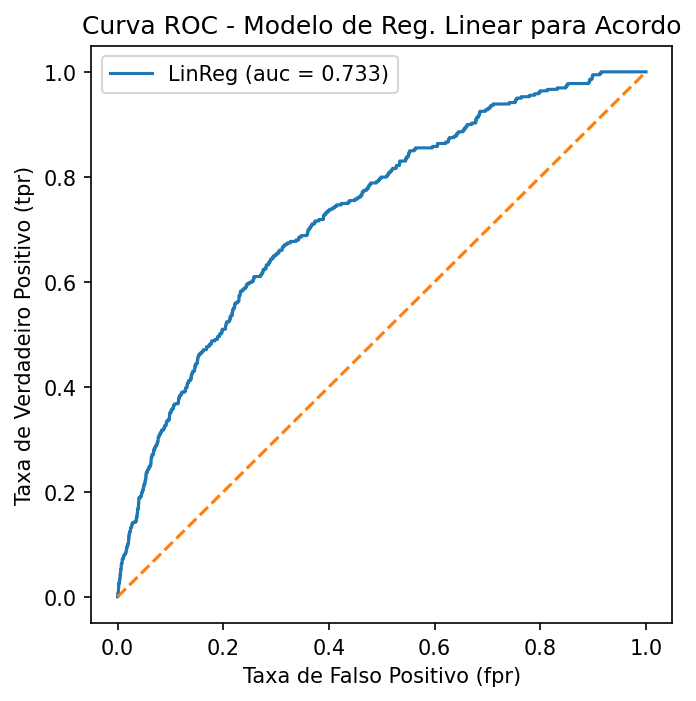

In [45]:
# Gráfico da curva ROC
plt.figure(figsize=(5,5), dpi=150)
plt.plot(fpr, tpr, ls='-', label='LinReg (auc = %0.3f)' % auc)
plt.plot([0,1],[0,1], ls='--')
plt.xlabel('Taxa de Falso Positivo (fpr)')
plt.ylabel('Taxa de Verdadeiro Positivo (tpr)')
plt.title('Curva ROC - Modelo de Reg. Linear para Acordo')
plt.legend()
plt.show()

In [46]:
# Encontra o limiar da probabilidade de corte que maximiza a auc (lift)
max_lift = np.argmax(tpr - fpr)
optimal_threshold = thresholds[max_lift]
yhat_binary = (yhat > optimal_threshold).astype(int)
print(f"Threshold ótimo: {optimal_threshold:.5f}")

Threshold ótimo: 0.00410


In [47]:
# Acurácia (quanto o modelo acerta em relação à realidade) e Precisão (taxa de acertos de valores positivos: tp / (tp + fp))
acur = metrics.accuracy_score(y_test, yhat_binary)
prec = metrics.precision_score(y_test, yhat_binary)
print(f'Acurácia do modelo = {acur:.1%}')
print(f'Precisão do modelo = {prec:.1%}')

Acurácia do modelo = 68.6%
Precisão do modelo = 0.7%


In [48]:
# taxa de sensibilidade
sensibilidade = metrics.recall_score(y_test, yhat_binary)
print(f'Sensibilidade do modelo = {sensibilidade:.1%}')

Sensibilidade do modelo = 66.6%


In [49]:
# taxa de especificidade
# matriz de confusão
conf_matrix = metrics.confusion_matrix(y_test, yhat_binary)

# Calcular a especificidade
especificidade = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Especificidade do modelo = {especificidade:.1%}')

Especificidade do modelo = 68.6%
